# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



# NOTES
We split parent into two regions $R_1$ and $R_2$

$RSS_{parent} = \sum_{y_i \in parent} (y_i - \bar{y})^2$

$RSS_{children} = \sum_{y_i \in R_{1}} (y_i - \bar{y}_{R_{1}})^2 + \sum_{y_i \in R_{2}} (y_i - \bar{y}_{R_2})^2 $

$RSS_{GAIN} = RSS_{parent} - RSS_{children}$    


**Total RSS**
Ex. Two leaves $A$ and $B$. Split $B$ into  $B_1$ and $B_2$

1) $RSS_{total} = RSS(A) + RSS(B)$
2) $RSS_{total} = RSS(A) + RSS(B_1) + RSS(B_2)$

# ANSWER 1
Maxxing $RSS_{GAIN}$ when $RSS_{parent}$ is fixed (because it doesn't depend on treshold and chosen feature) means minimazing $RSS_{children}$ which means *local RSS minimization* and *RSS gain maximization* are equivalent.


Total RSS is similar to other two when we calculate only current split and not any other splits. First two methods are **greedy** and do not track history.

# Counterexample: When TOTAL RSS and LOCAL RSS Differ

## Data
We have 5 data points with values:
$$(x_1,y_1 = 1), (x_2,y_2 = 2), (x_3,y_3 = 5), (x_4,y_4 = 5), (x_5,y_5 = 5)$$

## Initial Split
```
       [Root Split]
         X0 < 5
        /       \
   Leaf A      Leaf B
```

- **Leaf A**: $\{(x_1,y_1),(x_2,y_2)\}$
- **Leaf B**: $\{(x_3,y_3), (x_4,y_4), (x_5,y_5)\}$

## Initial RSS Calculations
- $\bar y_A = \frac{1+2}{2} = 1.5$
- $RSS(A) = (1-1.5)^2 + (2-1.5)^2 = 0.25 + 0.25 = 0.5$
- $RSS(B) = 0$ (all predictions match perfectly)
- $RSS_{total} = 0.5 + 0 = 0.5$

## Option 1: Split Leaf A

- $A_1: (x_1,y_1=1)$ with $\bar y_{A_1} = 1$, $RSS(A_1) = 0$
- $A_2: (x_2,y_2=2)$ with $\bar y_{A_2} = 2$, $RSS(A_2) = 0$
- **Result**: $RSS_{total} = 0 + 0 + 0 = 0$

## Option 2: Split Leaf B
- $B_1: (x_3,y_3=5),(x_4,y_4=5)$ with $\bar y_{B_1} = 5$, $RSS(B_1) = 0$
- $B_2: (x_5,y_5=5)$ with $\bar y_{B_2} = 5$, $RSS(B_2) = 0$
- **Result**: $RSS_{total} = 0.5 + 0 + 0 = 0.5$

## Key Observations
| Metric          | Split Leaf A | Split Leaf B |
|-----------------|--------------|--------------|
| Local RSS Gain  | 0.5          | 0            |
| Total RSS Gain  | 0.5 -> 0     | 0.5 -> 0.5   |

This shows:
1. **Local RSS** suggests only Leaf A offers improvement (0.5 gain)
2. **Total RSS** reveals that splitting Leaf A gives global improvement (0.5 -> 0)
3. Splitting Leaf B appears useless by local RSS, but might contain informative splits when considering feature interactions

# EMPIRICAL EXPERIMENT

3.6


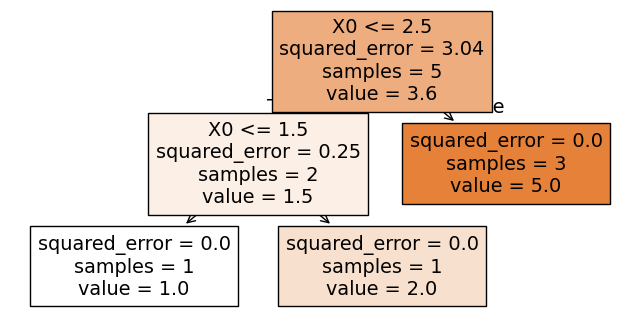

In [10]:
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

X = np.array([ [1], [2], [3], [4], [5]])
y = np.array([  1,   2,   5,   5,   5])
print(np.mean(y))

tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(8, 4))
plot_tree(tree, filled=True, feature_names=["X0"])
plt.show()

3. Expected Outputs
    ### WHICH ONE IS USING SKLREAN I WANT TO KNOWWWWWW...
    If scikit-learn uses local RSS minimization:
    It will split Leaf A (samples with y=1 and y=2) because the local RSS improvement is larger (0.5 → 0).

    If it uses total RSS minimization:
    It will split Leaf B (samples with y=5) because the total RSS drops maximally (0.5 → 0).